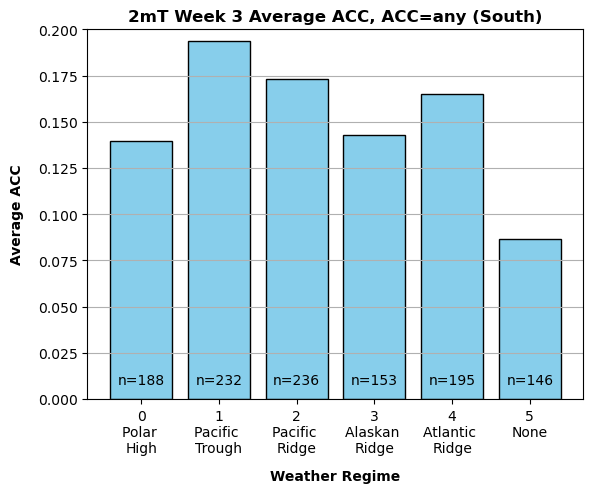

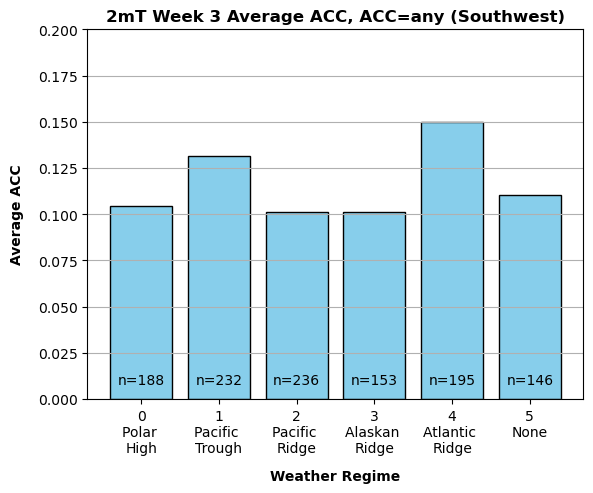

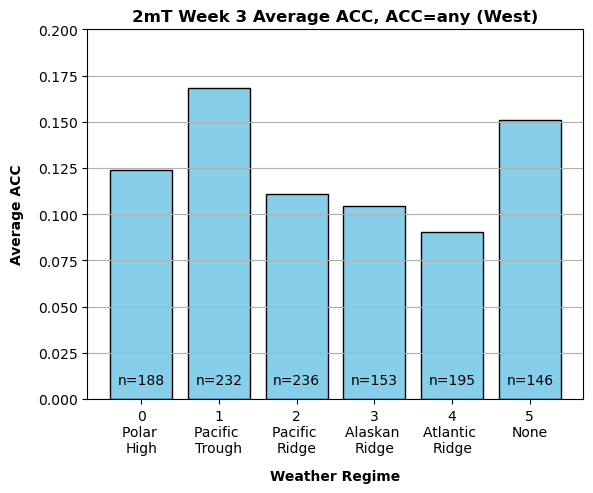

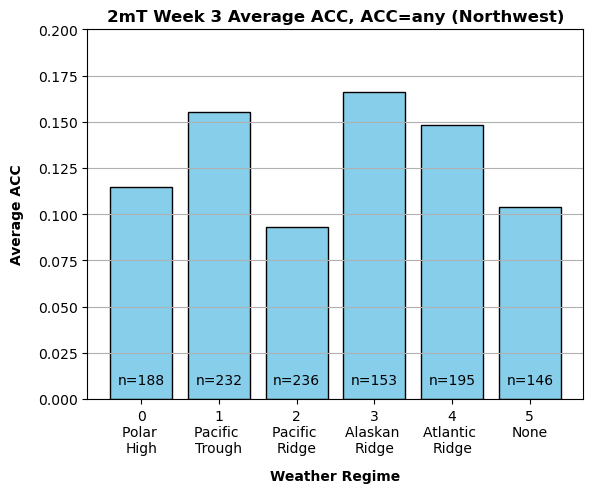

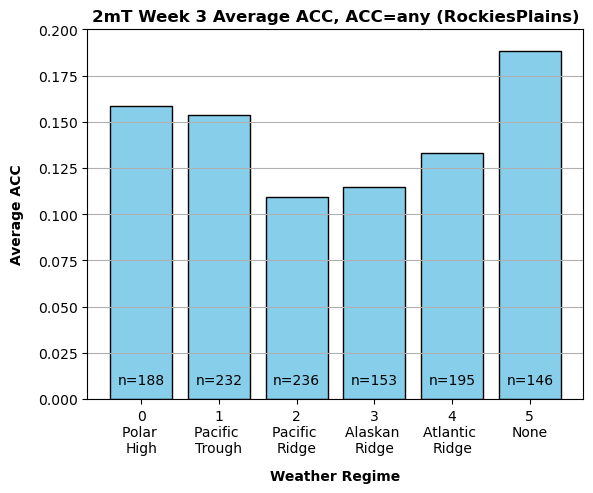

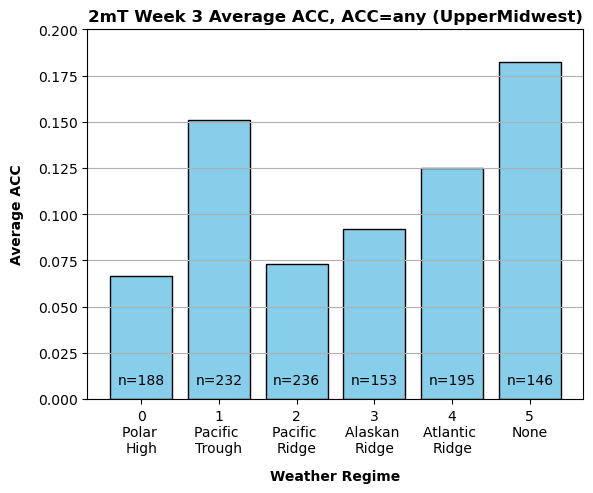

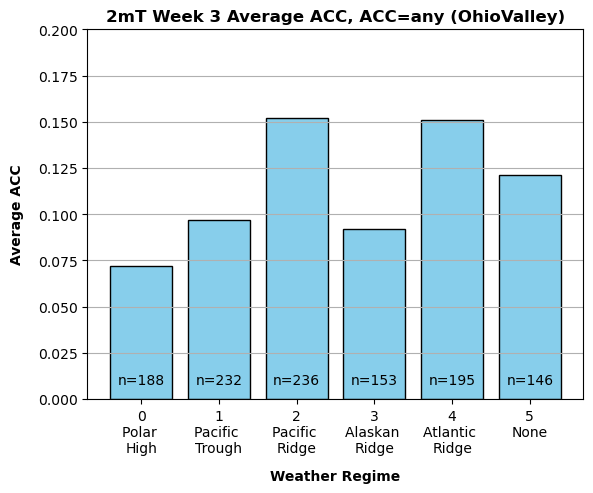

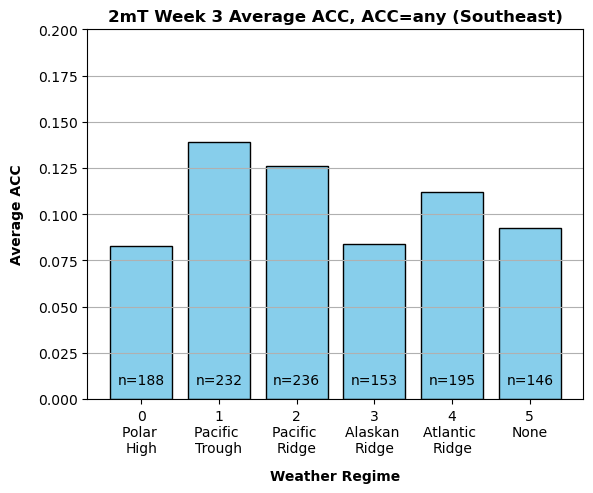

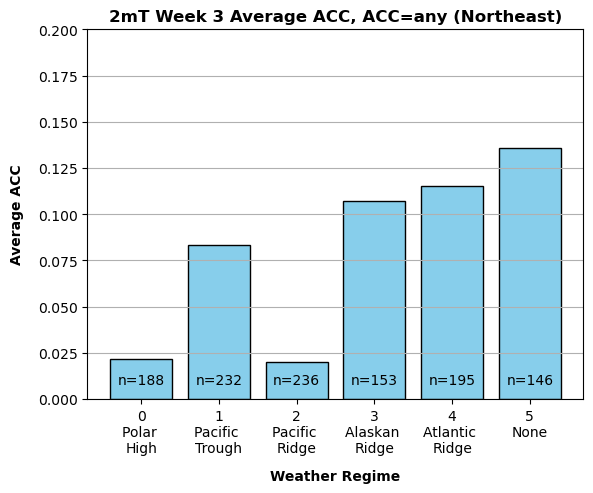

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = '/glade/work/sglanvil/CCR/S2S_windowsOfOpportunity/indices/df_labels_nocorrfilt_ERA5.csv'
df = pd.read_csv(file, skiprows=1, names=['date', 'WR', 'distances', 'corr'], parse_dates=['date'])
labels = ["0\nPolar \nHigh",
    "1\nPacific \nTrough",
    "2\nPacific \nRidge",
    "3\nAlaskan \nRidge",
    "4\nAtlantic \nRidge",
    "5\nNone"]

fileSIM = '/glade/campaign/cesm/development/cross-wg/S2S/sglanvil/data/tas_2m_anom_cesm2cam6v2.scenario1_s2s_data.nc'
ds = xr.open_dataset(fileSIM)
initSIM = pd.to_datetime(ds['date'], format='%Y%m%d')
# initSIM = initSIM + pd.Timedelta(days=14) # --------------- WARNING ---------------

region_groups = {'South': ['Kansas', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Mississippi'],
    'Southwest': ['Colorado', 'Arizona', 'Utah', 'New Mexico'],
    'West': ['California', 'Nevada'],
    'Northwest': ['Washington', 'Oregon', 'Idaho'],
    'RockiesPlains': ['Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Nebraska'],
    'UpperMidwest': ['Minnesota', 'Iowa', 'Wisconsin', 'Michigan'],
    'OhioValley': ['Missouri', 'Illinois', 'Indiana', 'Ohio', 'West Virginia', 'Kentucky', 'Tennessee'],
    'Southeast': ['Alabama', 'Georgia', 'Florida', 'South Carolina', 'North Carolina', 'Virginia'],
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'New York', 'Pennsylvania', 'Maryland', 
                  'Delaware', 'New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'District of Columbia']}

ds = xr.open_zarr("2mT_ACC_week3_byRegion_data.zarr")
for region_name in region_groups:
    R = ds[region_name]
    df_R = pd.DataFrame({'date': initSIM, 'R': R.values})
    merged = pd.merge(df[['date', 'WR']], df_R, on='date', how='inner')
    
    filtered = merged[merged['R'] > -1]  # ------------- SPECIFY
    mean_R_by_WR = filtered.groupby('WR')['R'].mean()
    counts_by_WR = filtered.groupby('WR')['R'].count()
    fig, ax = plt.subplots()
    bars = ax.bar(mean_R_by_WR.index, mean_R_by_WR.values, color='skyblue', edgecolor='k')
    # Add counts as text inside each bar
    for bar, count in zip(bars, counts_by_WR.values):
        ax.text(bar.get_x() + bar.get_width()/2, 0.01,
                f'n={count}', ha='center', va='center', fontsize=10, color='black')
    ax.set_title('2mT Week 3 Average ACC, ACC=any ('+region_name+')', fontweight='bold')
    ax.set_ylabel('Average ACC', fontweight='bold', labelpad=10)
    ax.set_xlabel('Weather Regime', fontweight='bold', labelpad=10)
    ax.set_xticks(mean_R_by_WR.index)
    ax.set_xticklabels(labels)
    ax.grid(axis='y')
    ax.set_ylim(0, 0.2)
    # plt.tight_layout()
    # plt.savefig("2mT_ACC_week34_WR_bar_ACCany_"+ region_name +".png", dpi=300)
    plt.show()
